XYZ is a private equity firm in US. Due to remarkable growth in the Cab Industry in last few years and
multiple key players in the market, it is planning for an investment in Cab industry.

Objective : Provide actionable insights to help XYZ firm in identifying the **right company** for making
investment.

1. Join 4 tables - inner in (cab), add a new column in cab - profit
2. Generate hypothesis 
    - Which company has maximum cab users at a particular time period?
    - Does margin proportionally increase with increase in number of customers?
    - What are the attributes of these customer segments?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
cab = pd.read_csv('data/Cab_Data.csv')
city = pd.read_csv('data/City.csv')
customers = pd.read_csv('data/Customer_ID.csv')
transcations = pd.read_csv('data/Transaction_ID.csv')

In [3]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
customers

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
transcations

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


## Data Cleanning

In [8]:
# Function to convert Excel serial date to datetime
def excel_serial_date_to_datetime(serial_date):
    excel_epoch = datetime(1899, 12, 30)
    converted_date = excel_epoch + timedelta(days=serial_date)
    return converted_date

cab['date'] = cab['Date of Travel'].apply(excel_serial_date_to_datetime)
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03


In [9]:
# Rename column
cab.rename(columns={
    'Transaction ID':'transcaction_id',
    'Company':'company',
    'City':'city',
    'KM Travelled': 'km',
    'Price Charged':'price',
    'Cost of Trip': 'cost'
}, inplace=True)

cab.drop(columns=['Date of Travel'], inplace=True)


In [10]:
# create a profit column 
cab['profit'] = cab['price'] - cab['cost']

In [11]:
# Define the new order of the columns
new_order = ['transcaction_id', 'date', 'company', 'city', 'km', 'price', 'cost', 'profit']

# Reindex the DataFrame with the new column order
cab = cab[new_order]

cab.head()

,transcaction_id,date,company,city,km,price,cost,profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [12]:
# rename customer table
customers.rename(columns={
    'Customer ID':'customer_id', 
    'Gender': 'gender',
    'Age': 'age',
    'Income (USD/Month)': 'monthly_income'
}, inplace=True)

# rename city table
city.rename(columns={
    'City': 'city',
    'Population':'population',
    'Users':'users'
}, inplace= True)

# Rename the transcations table
transcations.rename(columns={
    'Transaction ID':'transcaction_id',
    'Customer ID':'customer_id',
    'Payment_Mode':'payment_mode'
}, inplace=True)

In [13]:
##################################################

In [14]:
# check null value
cab.isnull().sum()

transcaction_id    0
date               0
company            0
city               0
km                 0
price              0
cost               0
profit             0
dtype: int64

In [15]:
city.isnull().sum()

city          0
population    0
users         0
dtype: int64

In [16]:
customers.isnull().sum()

customer_id       0
gender            0
age               0
monthly_income    0
dtype: int64

In [17]:
transcations.isnull().sum()

transcaction_id    0
customer_id        0
payment_mode       0
dtype: int64

No null Value found in tables

In [18]:
###################################################

**Merage Tables**

In [19]:
cab.head()

,transcaction_id,date,company,city,km,price,cost,profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [20]:
transcations.head()

,transcaction_id,customer_id,payment_mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [21]:
customers.head()

,customer_id,gender,age,monthly_income
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [22]:
city.head()

,city,population,users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [23]:
# Merge Table
# merge cab and transcations table
merge_cab_transcations = pd.merge(cab, transcations, on='transcaction_id', how= 'left')

# merge merge_cab_transcations and customers table
merged_table = pd.merge(merge_cab_transcations, customers, on='customer_id', how= 'left')

# reindex the columns
new_order = ['transcaction_id', 'date', 'company', 'city', 'km', 'price', 'cost',
       'profit', 'customer_id', 'gender', 'age', 'payment_mode', 'monthly_income']

merged_table = merged_table[new_order]

merged_table.head()

,transcaction_id,date,company,city,km,price,cost,profit,customer_id,gender,age,payment_mode,monthly_income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Male,28,Card,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Male,27,Card,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Male,53,Cash,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Male,23,Cash,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27182,Male,33,Card,8536


In [24]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   transcaction_id  359392 non-null  int64         
 1   date             359392 non-null  datetime64[ns]
 2   company          359392 non-null  object        
 3   city             359392 non-null  object        
 4   km               359392 non-null  float64       
 5   price            359392 non-null  float64       
 6   cost             359392 non-null  float64       
 7   profit           359392 non-null  float64       
 8   customer_id      359392 non-null  int64         
 9   gender           359392 non-null  object        
 10  age              359392 non-null  int64         
 11  payment_mode     359392 non-null  object        
 12  monthly_income   359392 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 35.6+ 

In [25]:
# merged_table.to_csv('data/merged_table.csv', index=False)

## EDA

In [82]:
merged_table['company'].value_counts()

company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [83]:
categories = merged_table['company'].value_counts().index.to_list()

values = merged_table['company'].value_counts().values.tolist()

In [112]:
merged_table.groupby('company')['profit'].sum().sort_values(ascending=False)

company
Yellow Cab    4.402037e+07
Pink Cab      5.307328e+06
Name: profit, dtype: float64

In [116]:
x2 = merged_table.groupby('company')['profit'].sum().sort_values(ascending=False).index.to_list()
y2 = merged_table.groupby('company')['profit'].sum().sort_values(ascending=False).values.tolist()


Text(0.5, 1.0, 'Total profit by Companies')

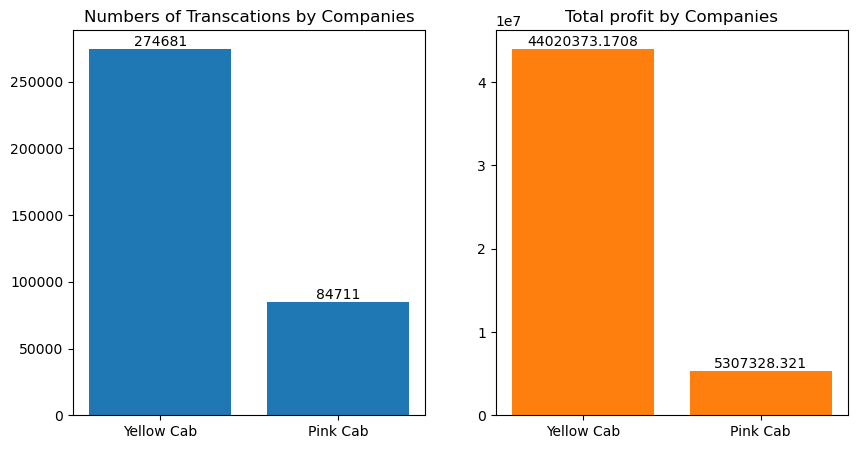

In [121]:
# Create a figure and a 2x1 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

bars= ax[0].bar(categories, values, color = 'C0')
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

bars = ax[1].bar(x2, y2, color='C1')
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Set titles for each subplot 
ax[0].set_title('Numbers of Transcations by Companies')
ax[1].set_title('Total profit by Companies')

In [123]:
######################################

In [125]:
# time series graph
# Group by 'date' and 'company', then aggregate to get total profit and number of transactions
time_series_data = merged_table.groupby(['date', 'company']).agg(total_profit=('profit', 'sum'),
                                                       number_of_transactions=('transcaction_id', 'count')).reset_index()
time_series_data

,date,company,total_profit,number_of_transactions
0,2016-01-02,Pink Cab,4809.4210,41
1,2016-01-02,Yellow Cab,45295.6412,140
2,2016-01-03,Pink Cab,10620.5820,52
3,2016-01-03,Yellow Cab,38449.5288,126
4,2016-01-04,Pink Cab,428.5910,4
...,...,...,...,...
2185,2018-12-29,Yellow Cab,98814.0764,630
2186,2018-12-30,Pink Cab,4019.0560,56
2187,2018-12-30,Yellow Cab,19574.0716,201
2188,2018-12-31,Pink Cab,4444.1560,58


In [126]:
# Pivot the data for plotting
pivot_df = time_series_data.pivot(index='date', columns='company', values=['total_profit', 'number_of_transactions'])
pivot_df

total_profit              number_of_transactions           
company        Pink Cab   Yellow Cab               Pink Cab Yellow Cab
date                                                                  
2016-01-02     4809.421   45295.6412                   41.0      140.0
2016-01-03    10620.582   38449.5288                   52.0      126.0
2016-01-04      428.591    3650.2012                    4.0       21.0
2016-01-05      745.359   11338.1156                    6.0       41.0
2016-01-06     2336.981   18663.4464                   23.0       86.0
...                 ...          ...                    ...        ...
2018-12-27     4299.130   28057.6524                   66.0      252.0
2018-12-28    18478.900  100411.4156                  217.0      626.0
2018-12-29    19399.999   98814.0764                  195.0      630.0
2018-12-30     4019.056   19574.0716                   56.0      201.0
2018-12-31     4444.156   17787.6068                   58.0      198.0

[1095 rows x 4 columns]

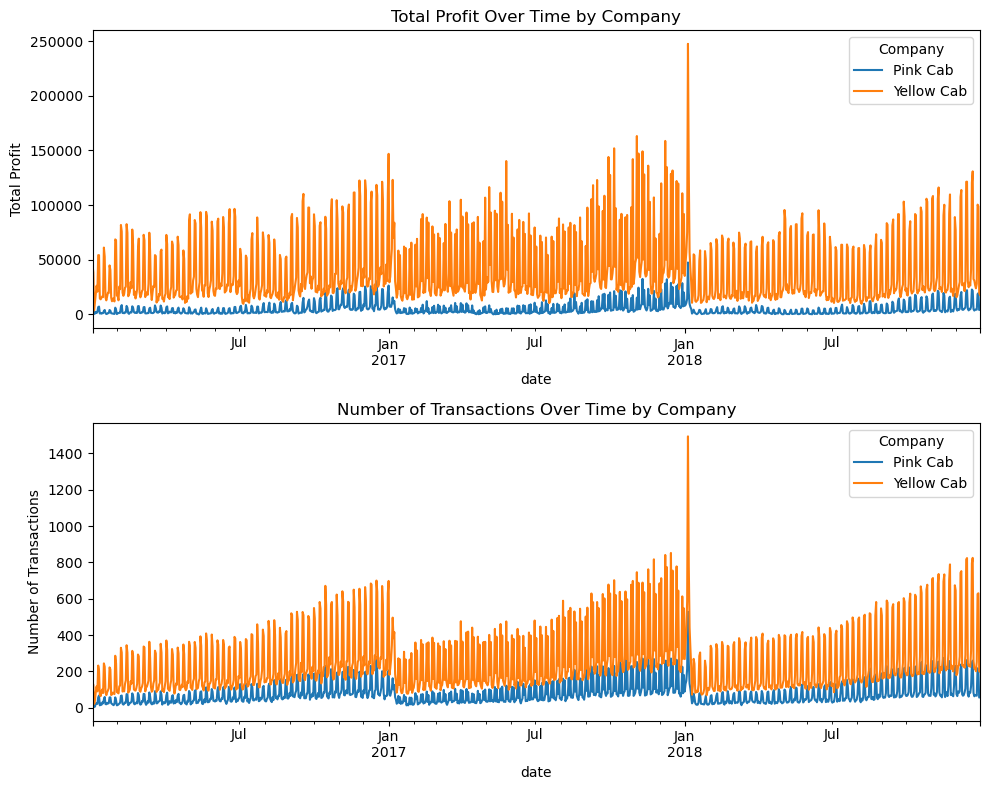

In [135]:
# Now plot using subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot total profit time series
pivot_df['total_profit'].plot(ax=ax[0])
ax[0].set_title('Total Profit Over Time by Company')
ax[0].set_ylabel('Total Profit')
ax[0].legend(title='Company')

# Plot number of transactions time series
pivot_df['number_of_transactions'].plot(ax=ax[1])
ax[1].set_title('Number of Transactions Over Time by Company')
ax[1].set_ylabel('Number of Transactions')
ax[1].legend(title='Company')

# Automatically adjust subplot params for a nice fit
plt.tight_layout()

In [136]:
merged_table['city'].value_counts()

city
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [139]:
merged_table.groupby(['company','city']).agg(city_counts=('city', 'count'))

city_counts
company    city                       
Pink Cab   ATLANTA GA             1762
           AUSTIN TX              1868
           BOSTON MA              5186
           CHICAGO IL             9361
           DALLAS TX              1380
           DENVER CO              1394
           LOS ANGELES CA        19865
           MIAMI FL               2002
           NASHVILLE TN           1841
           NEW YORK NY           13967
           ORANGE COUNTY          1513
           PHOENIX AZ              864
           PITTSBURGH PA           682
           SACRAMENTO CA          1334
           SAN DIEGO CA          10672
           SEATTLE WA             2732
           SILICON VALLEY         3797
           TUCSON AZ               799
           WASHINGTON DC          3692
Yellow Cab ATLANTA GA             5795
           AUSTIN TX              3028
           BOSTON MA             24506
           CHICAGO IL            47264
           DALLAS TX              5637
           DENVER CO              2431
           LOS ANGELES CA        28168
           MIAMI FL               4452
           NASHVILLE TN           1169
           NEW YORK NY           85918
           ORANGE COUNTY          2469
           PHOENIX AZ             1200
           PITTSBURGH PA           631
           SACRAMENTO CA          1033
           SAN DIEGO CA           9816
           SEATTLE WA             5265
           SILICON VALLEY         4722
           TUCSON AZ              1132
           WASHINGTON DC         40045

In [142]:
# Group by company and city and calculate the count
city_counts = merged_table.groupby(['company', 'city']).size().reset_index(name='count')
city_counts

,company,city,count
0,Pink Cab,ATLANTA GA,1762
1,Pink Cab,AUSTIN TX,1868
2,Pink Cab,BOSTON MA,5186
3,Pink Cab,CHICAGO IL,9361
4,Pink Cab,DALLAS TX,1380
5,Pink Cab,DENVER CO,1394
6,Pink Cab,LOS ANGELES CA,19865
7,Pink Cab,MIAMI FL,2002
8,Pink Cab,NASHVILLE TN,1841
9,Pink Cab,NEW YORK NY,13967


In [143]:
# Calculate the total count for each company
company_totals = city_counts.groupby('company')['count'].transform('sum')

In [149]:
company_totals

0      84711
1      84711
2      84711
3      84711
4      84711
5      84711
6      84711
7      84711
8      84711
9      84711
10     84711
11     84711
12     84711
13     84711
14     84711
15     84711
16     84711
17     84711
18     84711
19    274681
20    274681
21    274681
22    274681
23    274681
24    274681
25    274681
26    274681
27    274681
28    274681
29    274681
30    274681
31    274681
32    274681
33    274681
34    274681
35    274681
36    274681
37    274681
Name: count, dtype: int64

In [147]:
# Calculate the percentage for each city within each company
city_counts['percentage'] = (city_counts['count'] / company_totals)

In [153]:
city_counts.head()

,company,city,count,percentage
0,Pink Cab,ATLANTA GA,1762,0.020800
1,Pink Cab,AUSTIN TX,1868,0.022051
2,Pink Cab,BOSTON MA,5186,0.061220
3,Pink Cab,CHICAGO IL,9361,0.110505
4,Pink Cab,DALLAS TX,1380,0.016291


In [159]:
# Sort the values first by 'company' then by 'count' in descending order
city_counts_sorted = city_counts.sort_values(by=['company', 'count'], ascending=[True, False])

# Group by 'company' and take the top 5 for each
top_cities_by_company = city_counts_sorted.groupby('company').head(5)

# Separate the data for each company
pink_cab_data = top_cities_by_company[top_cities_by_company['company'] == 'Pink Cab']
yellow_cab_data = top_cities_by_company[top_cities_by_company['company'] == 'Yellow Cab']

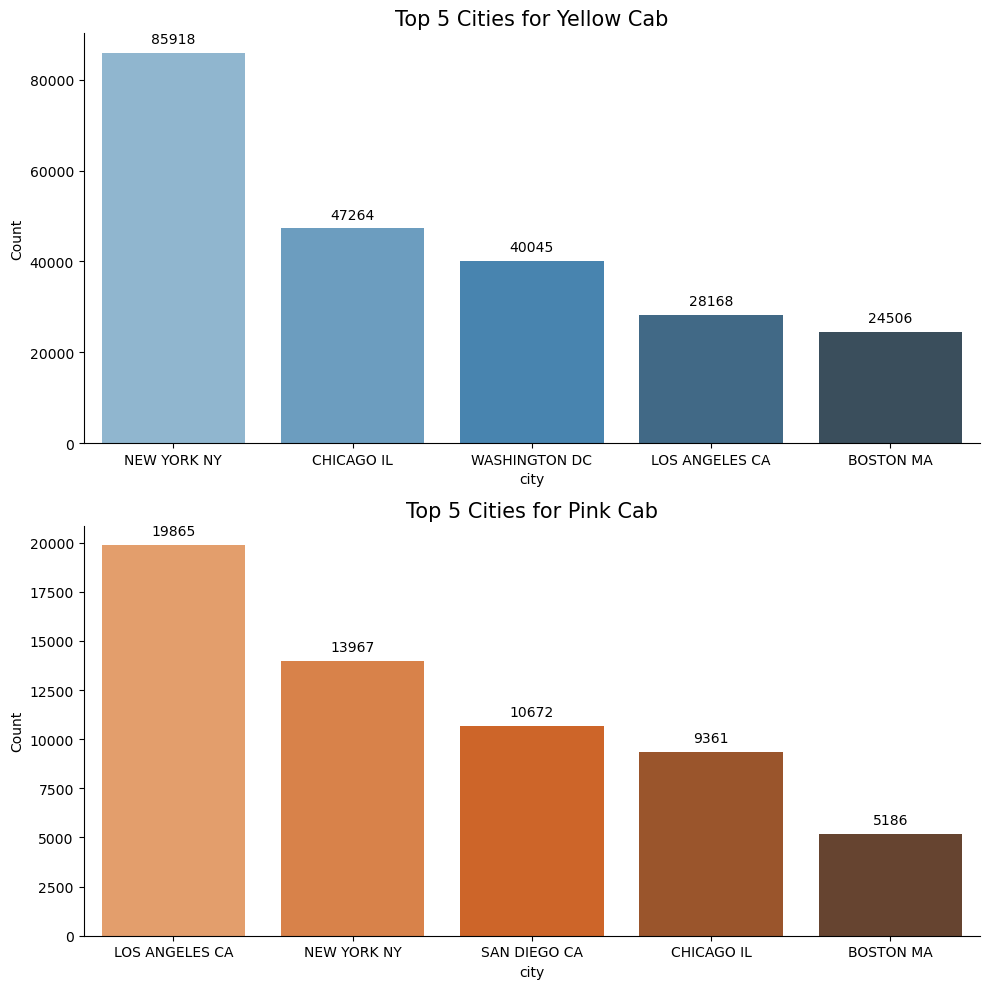

In [171]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Yellow Cab data in the second subplot
sns.barplot(x='city', y='count', data=yellow_cab_data, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 5 Cities for Yellow Cab', fontsize=15)
axes[0].set_ylabel('Count')

# Add count annotations to the Yellow Cab subplot
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Plot Pink Cab data in the first subplot
sns.barplot(x='city', y='count', data=pink_cab_data, ax=axes[1], palette="Oranges_d")
axes[1].set_title('Top 5 Cities for Pink Cab', fontsize=15)
axes[1].set_ylabel('Count')

# Add count annotations to the Pink Cab subplot
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')


# Hide the right and top spines (the black frame around the plot)
for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
# Adjust layout for a nice fit and to prevent labels from overlapping
plt.tight_layout()

Customer profile analysis

In [172]:
merged_table

,transcaction_id,date,company,city,km,price,cost,profit,customer_id,gender,age,payment_mode,monthly_income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Male,28,Card,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Male,27,Card,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Male,53,Cash,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Male,23,Cash,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Male,33,Card,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Male,24,Cash,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Male,32,Cash,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Male,56,Cash,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Male,32,Card,6423


In [176]:
customers_profile = merged_table[['company','date','profit','customer_id','gender', 'age', 'monthly_income']]
customers_profile.head()

,company,date,profit,customer_id,gender,age,monthly_income
0,Pink Cab,2016-01-08,57.315,29290,Male,28,10813
1,Pink Cab,2016-01-06,23.666,27703,Male,27,9237
2,Pink Cab,2016-01-02,27.568,28712,Male,53,11242
3,Pink Cab,2016-01-07,25.798,28020,Male,23,23327
4,Pink Cab,2016-01-03,16.844,27182,Male,33,8536


Text(0.5, 1.0, 'Age Distribution by Company')

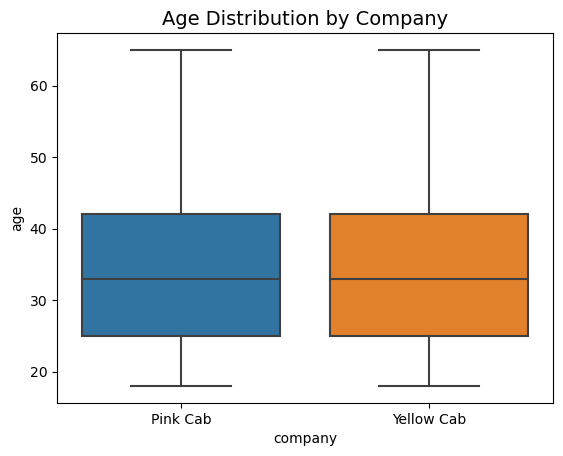

In [184]:
# Create a boxplot of 'age' by 'company'
sns.boxplot(x='company', y='age', data=customers_profile)

# Set title and adjust font size
plt.title('Age Distribution by Company', fontsize=14)

Text(0.5, 1.0, 'Income Distribution by Company')

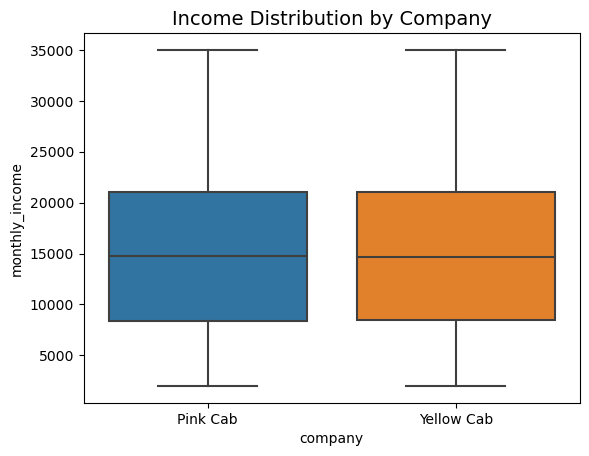

In [189]:
# Create a boxplot of 'age' by 'company'
sns.boxplot(x='company', y='monthly_income', data=customers_profile)

# Set title and adjust font size
plt.title('Income Distribution by Company', fontsize=14)

## Insights

Base on EDA analysis **Yellow Cab** is a better investment option. 

Here is some basic stats of two cabs company.

- Numbers of Transcations: Yellow Cab (274,681) Pink Cab (84,711)
- Total profit: Yellow Cab (44020373) Pink Cab (5307328)

From our grah that it did show seasonal effect on both cab company, and the sales and volatility increase throughout a year. 

For customers profie analysis:

Age and Income distribution are roughly the same, which means that the targe customers of two companys are pretty much the same.

For location:

Both companies has a concentration profit around urban arear, NYC, Loc Angeles, Chicago, these are the top cities to operate with business.

For the Time Series Forcasting 